# Atelier 1 : Régression

Université Abdelmalek Essaadi - FST Tanger  

Cycle Ingénieur LSI S3 - Machine Learning  

Pr. EL AACHAK LOTFI

Realiser Par : EL GORRIM MOHAMED

Ce notebook suit l’énoncé de l’atelier et est organisé en 4 parties :



1. **Data visualisation**

2. **Régression linéaire simple** (Expérience / Salaire)

3. **Régression linéaire multiple** (Assurance)

4. **Régression linéaire vs polynomiale** (China GDP)


In [9]:
#on commance par importer les bilbiothèques nécessaires

import numpy as np

import pandas as pd



import matplotlib.pyplot as plt

import seaborn as sns

from pandas.plotting import scatter_matrix



from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import mean_squared_error, mean_absolute_error



## Partie 1 : Data Visualisation



Dans cette partie, nous allons :

- Charger les données **Expérience / Salaire** et **Assurance**.

- Explorer les premières lignes, les types et les valeurs manquantes.

- Afficher le résumé statistique (`describe`).

- Visualiser les nuages de points demandés.


In [21]:
#on charge les datasets
salary = pd.read_csv('../dataset/Salary_Data.csv')
insurance = pd.read_csv('../dataset/insurance.csv')


In [69]:
salary.head()
salary.info()
salary.isna().sum()
salary.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [70]:
insurance.head()
insurance.info()
insurance.isna().sum()
insurance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
#résumé statistique des deux datasets
print("=== Résumé statistique Salary_Data ===")
display(salary.describe())

print("\n=== Résumé statistique insurance (numérique) ===")
display(insurance.describe())

=== Résumé statistique Salary_Data ===


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000



=== Résumé statistique insurance (numérique) ===


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


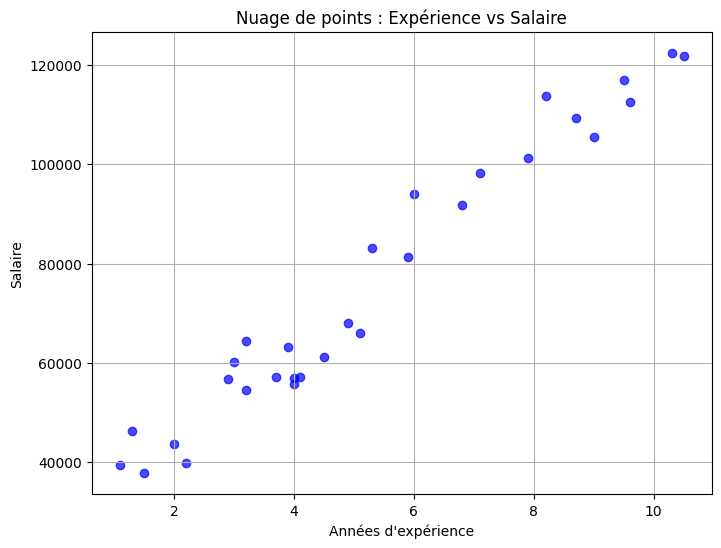

In [24]:
#nuage de points Expérience / Salaire
plt.figure(figsize=(8,6))
plt.scatter(salary['YearsExperience'], salary['Salary'], color='blue', alpha=0.7)
plt.title('Nuage de points : Expérience vs Salaire')
plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.grid(True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

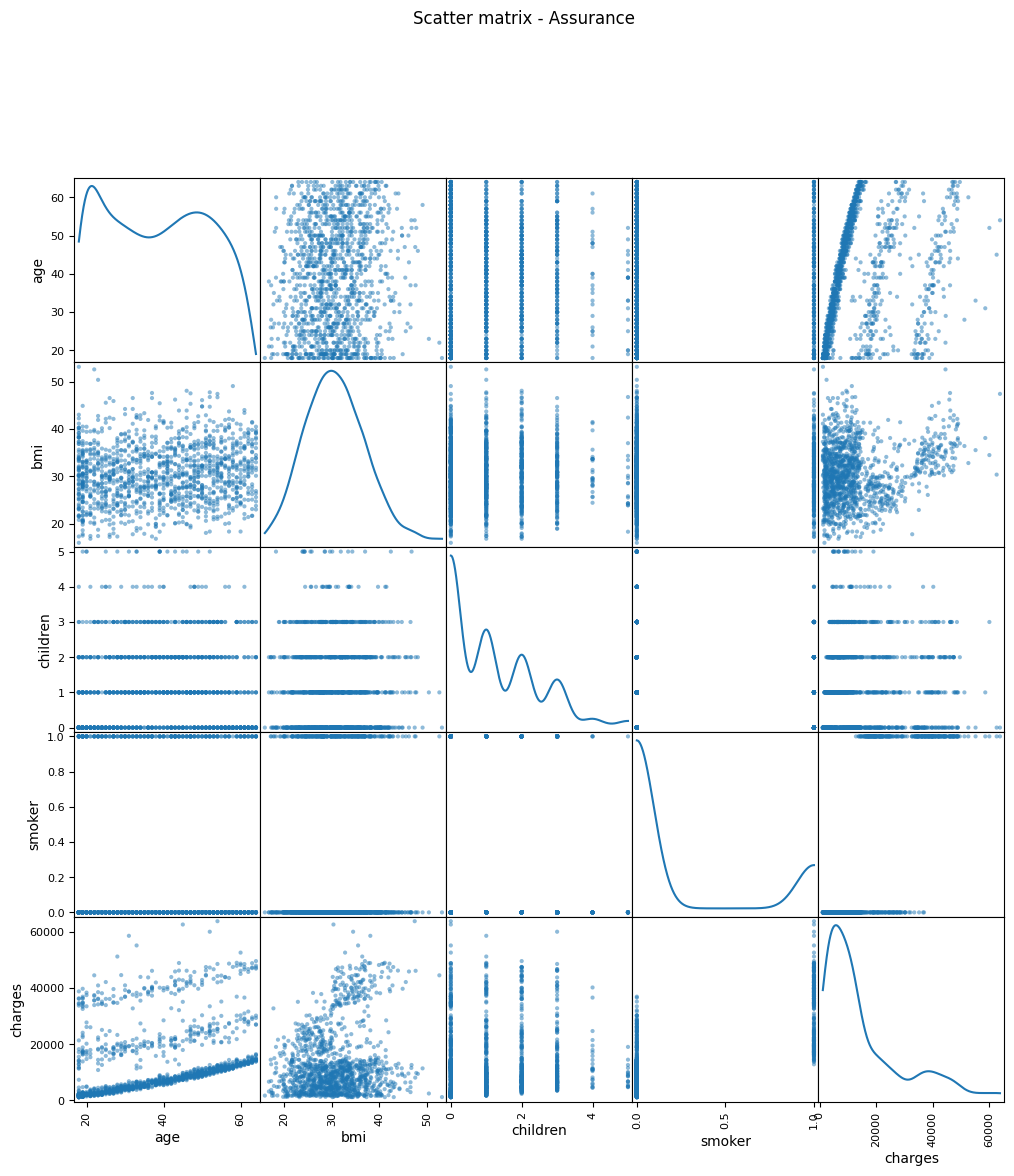

In [25]:
#scatter_matrix pour le dataset assurance
insurance_num = insurance.copy()
insurance_num['sex'] = insurance_num['sex'].map({'male':1,'female':0})
insurance_num['smoker'] = insurance_num['smoker'].map({'yes':1,'no':0})
insurance_num = pd.get_dummies(insurance_num, columns=['region'], drop_first=True)

plt.figure(figsize=(10,10))
scatter_matrix(insurance_num[['age','bmi','children','smoker','charges']], figsize=(12,12), diagonal='kde')
plt.suptitle('Scatter matrix - Assurance', y=1.02)
plt.show()

## Partie 2 : Régression linéaire simple (Expérience / Salaire)



Dans cette partie, on va :

1. Préparer les données (X, y) à partir du DataSet `Salary_Data`.

2. Séparer les données en **train** et **test**.

3. Entraîner un modèle de régression linéaire avec `sklearn`.

4. Prédire les salaires sur le jeu de test.

5. Visualiser la droite de régression.

6. Évaluer le modèle avec **MSE**, **RMSE** et **MAE**, puis interpréter les résultats.


In [ ]:
#Preparation des donnees pour la regression simple
X = salary[['YearsExperience']].values  # feature 2D
y = salary['Salary'].values            # target 1D

#separation du sets train / test en 80% / 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Taille X_train:", X_train.shape)
print("Taille X_test:", X_test.shape)

Taille X_train: (24, 1)
Taille X_test: (6, 1)


In [ ]:
#entrainement du modele de RLS
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Coefficient (pente):", lin_reg.coef_[0])
print("Ordonnée à l'origine (intercept):", lin_reg.intercept_)

Coefficient (pente): 9423.815323030976
Ordonnée à l'origine (intercept): 25321.583011776813


In [ ]:
#Evaluer le modele en utilisant LES trois methodes
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE (simple):", mse)
print("RMSE (simple):", rmse)
print("MAE (simple):", mae)

MSE (simple): 49830096.85590839
RMSE (simple): 7059.04362190151
MAE (simple): 6286.453830757749


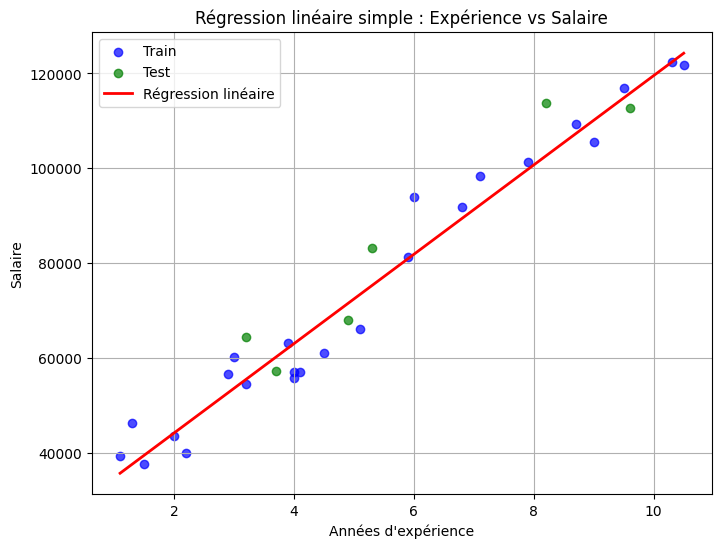

In [ ]:
#Visualisation : nuage de points + droite de régression
plt.figure(figsize=(8,6))

# Nuage de points (donnees train et test)
plt.scatter(X_train, y_train, color='blue', label='Train', alpha=0.7)
plt.scatter(X_test, y_test, color='green', label='Test', alpha=0.7)

# Droite de regression
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = lin_reg.predict(X_line)
plt.plot(X_line, y_line, color='red', linewidth=2, label='Régression linéaire')

plt.title("Régression linéaire simple : Expérience vs Salaire")
plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.legend()
plt.grid(True)
plt.show()

### Interprétation des métriques (régression linéaire simple)

- La droite (pente ≈ 9 424, intercept ≈ 25 322) capture bien la tendance générale : chaque année d’expérience ajoute en moyenne ~9.4 k€ au salaire estimé.
- MAE ≈ 6 286 € : écart absolu moyen; pour des salaires entre ~40 k€ et ~120 k€, l’erreur relative se situe autour de 5–8 %, acceptable mais non négligeable.
- RMSE ≈ 7 059 € (> MAE) : présence de quelques écarts plus importants (les grosses erreurs sont pénalisées au carré).
- MSE (≈ 4.98 × 10⁷) reflète surtout l’échelle des valeurs; peu interprétable directement.
- Le modèle, limité à une seule variable (YearsExperience), laisse une variance résiduelle notable : d’autres facteurs (poste, secteur, localisation, compétences) influencent le salaire.
- Utilisation : suffisant pour une estimation grossière, insuffisant pour une prédiction précise individuelle.
- Améliorations possibles :
    - Ajouter des features pertinentes (niveau d’étude, rôle, industrie).
    - Vérifier et traiter d’éventuels outliers.
    - Tester modèles régularisés (Ridge/Lasso) ou formes non linéaires si la relation change selon les paliers d’expérience.
    - Évaluer intervalles de confiance ou erreurs relatives selon les segments d’expérience.

## Partie 3 : Régression multiple (Assurance)



Dans cette partie, on va :

1. Faire une petite EDA sur le dataset `insurance` (corrélations, distribution des charges).

2. Sélectionner 3 features importantes (age, bmi, smoker) et justifier le choix.

3. Standardiser les features choisies.

4. Entraîner un modèle de régression linéaire multiple.

5. Prédire sur le jeu de test.

6. Visualiser charges réelles vs prédites.

7. Calculer MSE, RMSE, MAE et interpréter.


=== Résumé statistique insurance (numérique) ===


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Corrélations (numériques seulement) :


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


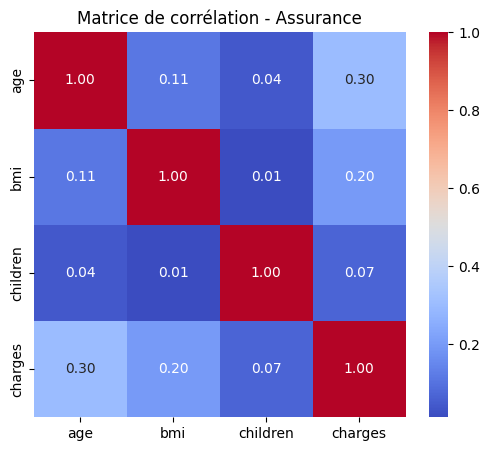

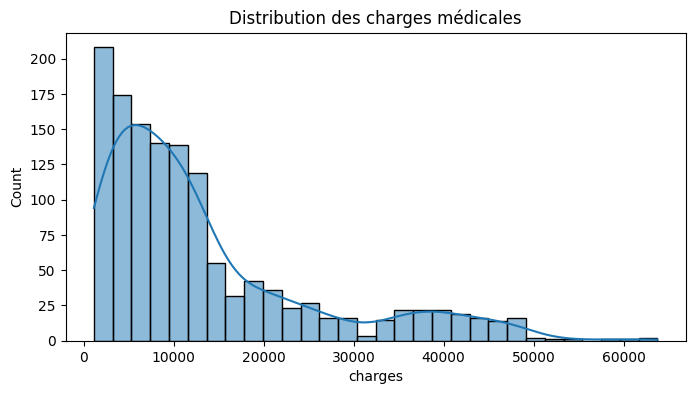

In [ ]:
#Exploratory Data Analysis sur le dataset assurance : corrélations et distribution des charges
print("=== Résumé statistique insurance (numérique) ===")
display(insurance.describe())

print("\nCorrélations (numériques seulement) :")
corr = insurance.select_dtypes(include=['number']).corr()
display(corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation - Assurance")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(insurance['charges'], kde=True)
plt.title("Distribution des charges médicales")
plt.xlabel("charges")
plt.show()

**Choix des trois features :**



D'après la matrice de corrélation et la logique métier :



- `age` : les charges augmentent en général avec l'âge.

- `bmi` : un IMC plus élevé est lié à plus de risques de santé donc plus de charges.

- `smoker` : être fumeur a un impact très fort sur les charges.



On va donc utiliser ces trois variables comme **features** pour la régression multiple.


In [31]:
#Préparation des données pour la régression multiple
ins_multi = insurance.copy()
ins_multi['smoker'] = ins_multi['smoker'].map({'yes':1,'no':0})

features = ['age','bmi','smoker']
X_m = ins_multi[features].values
y_m = ins_multi['charges'].values

#séparation train / test
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_m, y_m, test_size=0.2, random_state=42
)

print("Taille X_train_m:", X_train_m.shape)
print("Taille X_test_m:", X_test_m.shape)

Taille X_train_m: (1070, 3)
Taille X_test_m: (268, 3)


**Standardisation des features :**



Les variables `age` et `bmi` n'ont pas la même échelle, et `smoker` est binaire (0/1).



On applique une **standardisation** (moyenne 0, écart-type 1) afin de :



- faciliter l'apprentissage du modèle,

- comparer plus facilement l'importance relative des coefficients.


In [32]:
#Standardisation des features
scaler_m = StandardScaler()
X_train_m_scaled = scaler_m.fit_transform(X_train_m)
X_test_m_scaled = scaler_m.transform(X_test_m)

print("Moyenne après scaling (train):", X_train_m_scaled.mean(axis=0))
print("Écart-type après scaling (train):", X_train_m_scaled.std(axis=0))

Moyenne après scaling (train): [-1.97142406e-16  2.28982202e-15  1.77635684e-16]
Écart-type après scaling (train): [1. 1. 1.]


In [33]:
#Entraînement du modèle de régression linéaire multiple
lin_reg_m = LinearRegression()
lin_reg_m.fit(X_train_m_scaled, y_train_m)

print("Coefficients (dans l'ordre des features):")
for f, c in zip(features, lin_reg_m.coef_):
    print(f"  {f} : {c}")
print("Intercept:", lin_reg_m.intercept_)

Coefficients (dans l'ordre des features):
  age : 3649.2224392755106
  bmi : 1971.9425409818946
  smoker : 9568.279088307501
Intercept: 13346.08973636448


In [34]:
#Prédiction et évaluation pour le modèle multiple
y_pred_m = lin_reg_m.predict(X_test_m_scaled)

mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)
mae_m = mean_absolute_error(y_test_m, y_pred_m)

print("MSE (multiple):", mse_m)
print("RMSE (multiple):", rmse_m)
print("MAE (multiple):", mae_m)

MSE (multiple): 34512843.88022789
RMSE (multiple): 5874.763304187488
MAE (multiple): 4260.560091099393


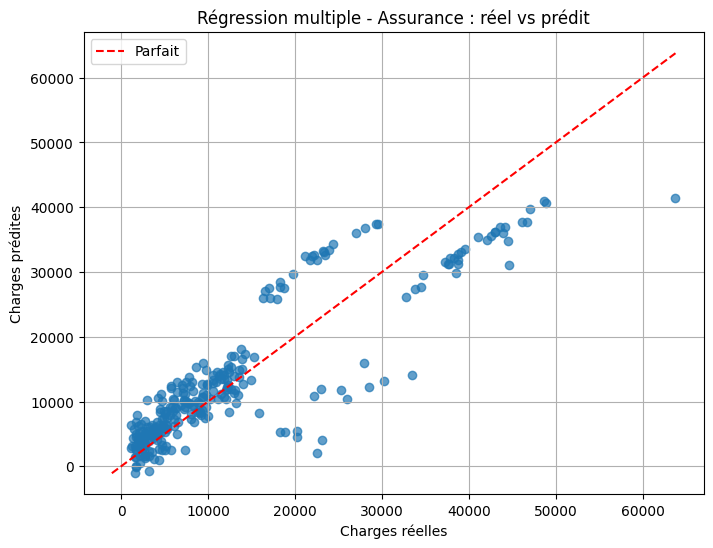

In [35]:
#Visualisation : charges réelles vs charges prédites
plt.figure(figsize=(8,6))
plt.scatter(y_test_m, y_pred_m, alpha=0.7)
plt.xlabel("Charges réelles")
plt.ylabel("Charges prédites")
plt.title("Régression multiple - Assurance : réel vs prédit")

# Ligne y = x (référence parfaite)
min_val = min(y_test_m.min(), y_pred_m.min())
max_val = max(y_test_m.max(), y_pred_m.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Parfait')
plt.legend()
plt.grid(True)
plt.show()

- Régression linéaire simple (Salaire): MAE ≈ 6.3 k€, RMSE ≈ 7.1 k€ pour des salaires entre ~40 k€ et ~120 k€ ⇒ erreur relative moyenne ≈ 5–8 %. Le modèle capte la tendance (expérience ↗ salaire) mais une seule variable laisse une variance résiduelle liée à d’autres facteurs non inclus (poste, secteur, localisation, compétences). MSE élevé surtout dû à l’échelle (peu interprétable seul).

- Régression linéaire multiple (Assurance): MAE ≈ 4.26 k$, RMSE ≈ 5.87 k$ pour des charges de 1 k$ à 63 k$ (distribution très étalée et asymétrique). L’ajout de age, bmi, smoker réduit sensiblement l’erreur (RMSE et MAE plus faibles), surtout grâce à la variable smoker fortement corrélée aux charges. L’erreur absolue reste proportionnellement plus élevée pour les très petites charges (effet d’échelle), mais le modèle améliore la stabilité des prédictions globales par rapport à une régression mono-variable.

- Comparaison: Le modèle multiple explique mieux la variabilité (baisse MAE et RMSE) car il incorpore des dimensions de risque (tabagisme, état corporel, âge). Le modèle simple est acceptable pour une estimation grossière, le multiple est plus informatif mais encore perfectible.

- Améliorations possibles (assurance): Ajouter region, children, sex; créer interactions (smoker * bmi), transformations (log(charges) pour réduire l’asymétrie), tester régularisation ou modèles non linéaires (polynomial léger, arbres), évaluer R² et erreur relative (%) pour une lecture plus intuitive.

- Synthèse: Les métriques confirment que la richesse des features réduit l’erreur; la qualité reste limitée par l’absence d’autres facteurs latents et par la dispersion intrinsèque des cibles.


## Partie 4 : Régression linéaire vs polynomiale (China GDP)



Dans cette partie, on va :

1. Charger le dataset `china_gdp.csv`.

2. Entraîner un modèle de régression linéaire simple.

3. Entraîner un modèle de régression polynomiale (par exemple degré 3).

4. Prédire le GDP sur un ensemble de test.

5. Visualiser les deux modèles sur un même graphe.

6. Calculer MSE, RMSE, MAE pour les deux modèles et comparer.


In [36]:
#Chargement du dataset China GDP
china = pd.read_csv('../dataset/china_gdp.csv')
china.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [37]:
#Préparation des données pour la régression
X_c = china[['Year']].values
y_c = china['Value'].values

#séparation train/test
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_c, y_c, test_size=0.2, random_state=42
)

print("Taille X_train_c:", X_train_c.shape)
print("Taille X_test_c:", X_test_c.shape)

Taille X_train_c: (44, 1)
Taille X_test_c: (11, 1)


In [38]:
#Modèle de régression linéaire simple (China GDP)
lin_reg_c = LinearRegression()
lin_reg_c.fit(X_train_c, y_train_c)

y_pred_lin_test = lin_reg_c.predict(X_test_c)

mse_lin = mean_squared_error(y_test_c, y_pred_lin_test)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y_test_c, y_pred_lin_test)

print("=== Régression linéaire China GDP ===")
print("MSE:", mse_lin)
print("RMSE:", rmse_lin)
print("MAE:", mae_lin)

=== Régression linéaire China GDP ===
MSE: 2.9097229920495426e+24
RMSE: 1705791016522.699
MAE: 1341446144991.7834


In [82]:
#Modèle de régression polynomiale (degré 3)
degree = 3
poly_feat = PolynomialFeatures(degree=degree, include_bias=False)

X_train_c_poly = poly_feat.fit_transform(X_train_c)
X_test_c_poly = poly_feat.transform(X_test_c)

lin_reg_c_poly = LinearRegression()
lin_reg_c_poly.fit(X_train_c_poly, y_train_c)

y_pred_poly_test = lin_reg_c_poly.predict(X_test_c_poly)

mse_poly = mean_squared_error(y_test_c, y_pred_poly_test)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test_c, y_pred_poly_test)

print(f"=== Régression polynomiale (degré {degree}) China GDP ===")
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)
print("MAE:", mae_poly)

=== Régression polynomiale (degré 3) China GDP ===
MSE: 2.111877977037414e+23
RMSE: 459551735611.717
MAE: 416882070285.0478


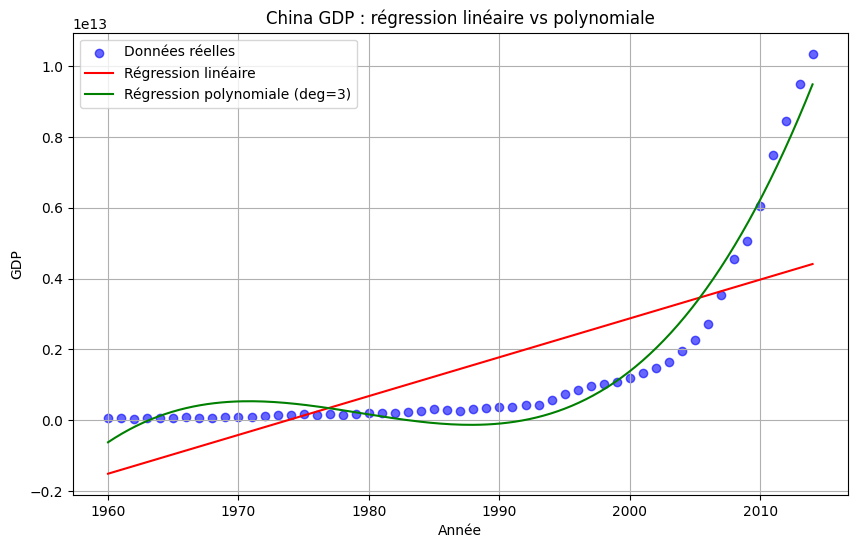

In [83]:
#Visualisation des deux modèles sur toute la plage d'années
years_grid = np.linspace(X_c.min(), X_c.max(), 200).reshape(-1, 1)

# prédictions linéaires
y_lin_grid = lin_reg_c.predict(years_grid)

# prédictions polynomiales
years_grid_poly = poly_feat.transform(years_grid)
y_poly_grid = lin_reg_c_poly.predict(years_grid_poly)

plt.figure(figsize=(10,6))
plt.scatter(X_c, y_c, color='blue', alpha=0.6, label='Données réelles')
plt.plot(years_grid, y_lin_grid, color='red', label='Régression linéaire')
plt.plot(years_grid, y_poly_grid, color='green', label=f'Régression polynomiale (deg={degree})')

plt.title('China GDP : régression linéaire vs polynomiale')
plt.xlabel('Année')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

**Interprétation (China GDP) :**



- La croissance du GDP chinois est fortement non linéaire (courbe convexe).  

- Le modèle de régression **linéaire** ne suit pas bien la courbure → erreurs (MSE, RMSE, MAE) plus élevées.  

- Le modèle **polynomial de degré 3** s'adapte mieux à la forme de la courbe, ce qui diminue généralement les erreurs.  

- Attention : si on augmente trop le degré, on risque le sur-apprentissage (courbe qui colle trop aux données).  
